# 당뇨병 데이터로 다중회귀
- LinearRegression
- SVR
- RandomForestRegressor
- MSE비교

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 데이터 전처리

In [15]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [16]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


2. 훈련/테스트 데이터셋 분리

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

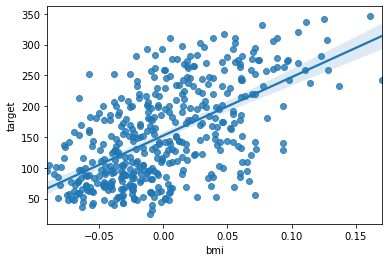

In [24]:
sns.regplot(x = 'bmi', y = 'target', data = df)
plt.show()

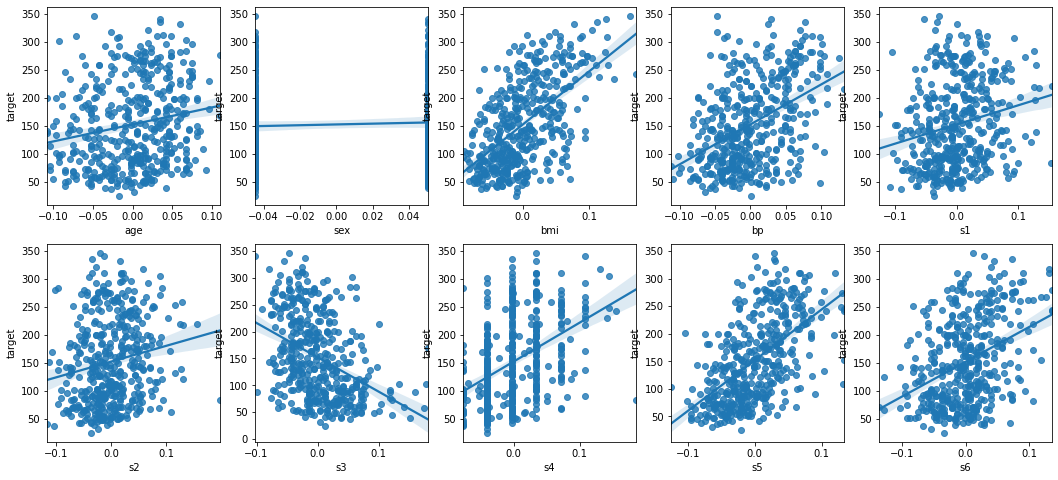

In [29]:
_, axs = plt.subplots(2, 5, figsize = (18, 8))

# for i , feature in zip(range(0, 10), df.columns[:-1]):

for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5
    sns.regplot(x=feature, y = 'target', data = df, ax = axs[row][col])

plt.show()

3. 학습/예측/평가

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
lr.score(X_test, y_test)

0.45584017860891035

In [31]:
lr.coef_

array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
       -656.22582592,  364.21134557,   60.28474402,  182.53318837,
        702.08292875,   68.21197298])

In [32]:
lr.intercept_

151.67372554450927

In [33]:
np.dot(X_test, lr.coef_) + lr.intercept_

array([156.03121644, 185.70049526, 162.86384045, 162.54544148,
        78.51849397,  60.6006943 , 175.198247  , 176.7708708 ,
       131.42519735,  88.0537722 , 182.06745271, 125.38694592,
       122.94584881, 175.88337484, 165.04366099, 122.46227623,
       154.00789511, 156.28760568, 163.873603  , 190.61471428,
        81.91824922, 149.28474513, 168.78043889,  52.665137  ,
       253.98654186, 253.16663718, 142.5383034 , 201.95489834,
       125.09884927, 155.64491829, 168.33251496, 111.73916649,
       141.34776468, 159.39865731, 129.45826426, 122.49486964,
       155.00302033, 204.71273072, 175.97337738, 231.52683591,
       231.65409045, 186.87966013, 160.36515649, 125.57517593,
        89.00504061])

In [34]:
pred_lr = lr.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)
mse_lr

2370.1978745563174

4. 다른 모델과의 mse비교

In [37]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=2021)
dtr.fit(X_train, y_train)
pred_dt = dtr.predict(X_test)
mse_dt = mean_squared_error(y_test, pred_dt)
mse_dt

6832.311111111111

In [38]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)
mse_sv

3960.9366880199996

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
mse_rf

3824.664311111111

In [41]:
df_mse = pd.DataFrame({
    'y_test' : y_test, 'LR' : pred_lr, 'SVM' : pred_sv, 'RF' : pred_rf
})
df_mse.head()

,y_test,LR,SVM,RF
0,155.0,156.031216,133.705341,111.79
1,167.0,185.700495,146.907788,144.81
2,185.0,162.863840,140.965960,175.52
3,109.0,162.545441,144.683128,154.34
4,65.0,78.518494,118.088552,96.48


In [42]:
print(mse_lr, mse_sv, mse_rf)

2370.1978745563174 3960.9366880199996 3824.664311111111


# 선생님 해설

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


* 각 피쳐별 산점도와 선형회귀선

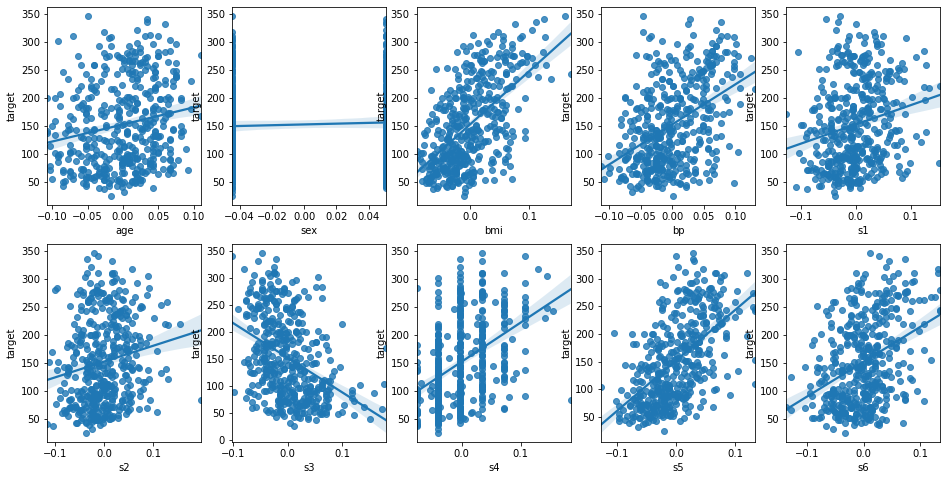

In [4]:
_, axs = plt.subplots(nrows= 2, ncols=5, figsize = (16, 8))

for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data = df, ax = axs[row][col])

* 각 피쳐별 R square value

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
y = diabetes.target

for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1, 1)  # df[feature]는 시리즈, 시리즈를 2차원 데이터로 바꿀 수 없으므로 
                                           # np.array로 바꾼 뒤 reshape한다
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}: {r2:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


* dataset 분리

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

### Regressor 별 MSE 비교

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, pred_lr)

In [10]:
# SVR

svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
mse_sv = mean_squared_error(y_test, pred_sv)

In [11]:
# Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)

* 결과 비교

In [12]:
# MSE
print(f'LR : {mse_lr:.4f}, SVR : {mse_sv:.4f}, RFR : {mse_rf:.4f}')

LR : 2370.1979, SVR : 3960.9367, RFR : 3596.4982


In [13]:
# 실제값과 예측값 비교
df = pd.DataFrame({
    'y_test' : y_test, 'LR' : pred_lr, 'SVR' : pred_sv, 'RFR' : pred_rf
})
df.head(10)

,y_test,LR,SVR,RFR
0,155.0,156.031216,133.705341,113.41
1,167.0,185.700495,146.907788,128.45
2,185.0,162.863840,140.965960,178.97
3,109.0,162.545441,144.683128,157.17
4,65.0,78.518494,118.088552,86.22
5,77.0,60.600694,124.899794,95.02
6,277.0,175.198247,152.459542,161.02
7,244.0,176.770871,153.097167,163.17
8,148.0,131.425197,121.363033,110.85
9,102.0,88.053772,129.184107,138.78
